In [1]:
from google.colab import files
uploaded = files.upload()

Saving Salary_dataset.csv to Salary_dataset.csv


12680.086193503517 2805.924102789842


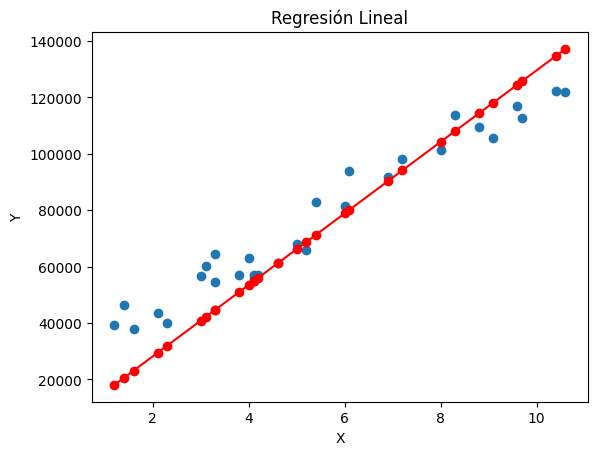

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importar los Datos
data = pd.read_csv('Salary_dataset.csv')
x_values = data['YearsExperience'].values
y_values = data['Salary'].values

# Función del descenso del gradiente para regresión lineal
def mse(y_true, y_predicted):
    return np.sum((y_true - y_predicted) ** 2) / len(y_true)

def linear_regression_gradient_descent(X, Y, iterations=100, learning_rate=0.0001, stopping_threshold=1e-06):
    slope = 0
    intercept = 0
    num_samples = float(len(X))
    previous_cost = None
    logs = []
    errors = []

    for i in range(iterations):
        predicted = slope * X + intercept  # Valor predicho

        # Calcular el costo
        current_cost = mse(Y, predicted)

        # Verificar si el cambio es menor que el umbral de detención
        if previous_cost and abs(previous_cost - current_cost) <= stopping_threshold:
            break

        previous_cost = current_cost

        # Derivadas parciales con respecto a la pendiente y la intersección
        gradient_slope = (-2 / num_samples) * np.dot(X, (Y - predicted))  # Derivada con respecto a la pendiente
        gradient_intercept = (-2 / num_samples) * np.sum(Y - predicted)  # Derivada con respecto a la intersección

        # Actualizar la pendiente y la intersección
        slope -= learning_rate * gradient_slope
        intercept -= learning_rate * gradient_intercept

        errors.append(current_cost)
        logs.append((slope, intercept))

    return slope, intercept, logs, errors

# Mostrando Resultados en una Gráfica
slope, intercept, logs, errors = linear_regression_gradient_descent(x_values, y_values, learning_rate=0.001)
y_pred = slope*x_values + intercept

print(slope, intercept)
plt.scatter(x_values, y_values)
plt.plot(x_values, y_pred, color='red', marker='o', linestyle='-')  # Línea de Regresión
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresión Lineal')
plt.show()